In [3]:
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='en') # need to run only once to download and load model into memory

[2024/09/14 21:51:05] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=True, use_xpu=False, use_npu=False, use_mlu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, gpu_id=0, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='C:\\Users\\LalitDumka/.paddleocr/whl\\det\\en\\en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='C:\\Users\\LalitDumka/.paddleocr/whl\\rec\\en\\en_PP-OCRv4_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_b

In [4]:
img_path = r'D:\ML\amazon_ml_2024\student_resource\dataset\images\train\31FtKURrRxL.jpg'
result = ocr.ocr(img_path, cls=True,inv=True)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line[-1][0])
# print(result)

[2024/09/14 21:51:20] ppocr DEBUG: dt_boxes num : 9, elapsed : 5.351045370101929
[2024/09/14 21:51:22] ppocr DEBUG: cls num  : 9, elapsed : 2.5145263671875
[2024/09/14 21:51:23] ppocr DEBUG: rec_res num  : 9, elapsed : 0.4260218143463135
26F
M025db-
1pcs/ctn


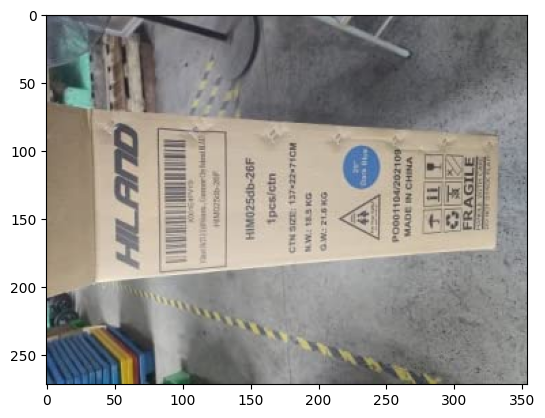

In [5]:
import cv2
import matplotlib.pyplot as plt

image = cv2.imread(img_path)

#show the image in notebook
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))


In [6]:
def noise_removal(image):
    import numpy as np
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    kernel = np.ones((1, 1), np.uint8)
    image = cv2.erode(image, kernel, iterations=1)
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel)
    image = cv2.medianBlur(image, 3)
    return (image)

In [7]:
def thick_font(image):
    import numpy as np
    image = cv2.bitwise_not(image)
    kernel = np.ones((2,2),np.uint8)
    image = cv2.dilate(image, kernel, iterations=1)
    image = cv2.bitwise_not(image)
    return (image)

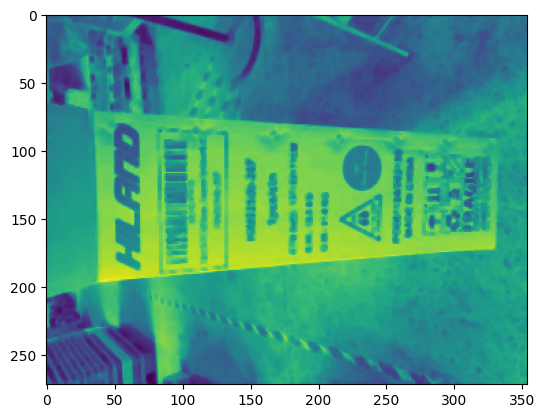

In [8]:
#make image filter for better OCR results
def filter(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # thresh, im_bw = cv2.threshold(gray_image, 150, 210, cv2.THRESH_BINARY)
    img = noise_removal(gray_image)
    img = thick_font(img)
    return img

plt.imshow(filter(image))




True

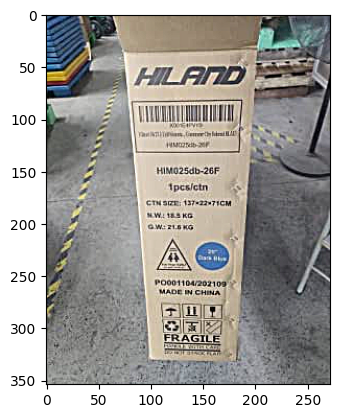

In [9]:
gaussian_3 = cv2.GaussianBlur(image, (11, 11), 2.0)
unsharp_image = cv2.addWeighted(image, 2.5, gaussian_3, -1.5, 0)
rotated = cv2.rotate(unsharp_image, cv2.ROTATE_90_CLOCKWISE)
plt.imshow(cv2.cvtColor(rotated, cv2.COLOR_BGR2RGB))
cv2.imwrite("example_unsharp.jpg", rotated)

In [10]:
#test the OCR on the filtered image
result = ocr.ocr(unsharp_image, cls=True)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line[-1][0])
# print(result)

[2024/09/14 21:51:26] ppocr DEBUG: dt_boxes num : 11, elapsed : 0.06593918800354004
[2024/09/14 21:51:26] ppocr DEBUG: cls num  : 11, elapsed : 0.05366063117980957


[2024/09/14 21:51:26] ppocr DEBUG: rec_res num  : 11, elapsed : 0.16614961624145508
HLAO
CN
HIM025db-26F
1pcs/ctn
NW8SKG
AG
t


In [11]:
# def apply_dynamic_filter(gray):
#     # gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
#     mean, std_dev = cv2.meanStdDev(gray)
    
#     if std_dev[0][0] < 30:
#         clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#         filtered = clahe.apply(gray)
#     elif std_dev[0][0] > 60:
#         filtered = cv2.GaussianBlur(gray, (3, 3), 0)
#     else:
#         filtered = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
    
#     return filtered


[2024/09/14 21:51:27] ppocr DEBUG: dt_boxes num : 7, elapsed : 0.06766533851623535
[2024/09/14 21:51:27] ppocr DEBUG: cls num  : 7, elapsed : 0.06089639663696289
[2024/09/14 21:51:28] ppocr DEBUG: rec_res num  : 7, elapsed : 0.1827406883239746
For sale in India only
Md.By
Ema
1800-1028384
sath.co.in


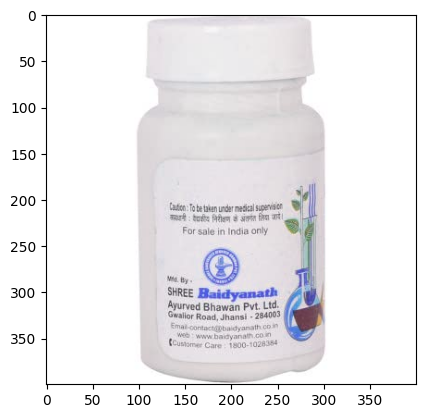

In [12]:
import cv2
import numpy as np

def dynamic_preprocess(image):
    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Calculate image statistics
    mean_brightness = np.mean(gray_image)
    std_dev_brightness = np.std(gray_image)
    
    # Adjust contrast dynamically
    # if mean_brightness < 100:  # Low brightness, increase contrast
    #     gray_image = cv2.equalizeHist(gray_image)

    # # Apply adaptive thresholding based on brightness
    # if std_dev_brightness > 50:  # High contrast variation
    #     threshold_image = cv2.adaptiveThreshold(gray_image, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    #                                             cv2.THRESH_BINARY, 11, 2)
    # else:  # Low contrast variation
    #     _, threshold_image = cv2.threshold(gray_image, 127, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Apply skew correction if needed
    coords = np.column_stack(np.where(gray_image > 0))
    angle = cv2.minAreaRect(coords)[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    if abs(angle) > 1:  # Only apply skew correction if angle is significant
        (h, w) = gray_image.shape[:2]
        center = (w // 2, h // 2)
        M = cv2.getRotationMatrix2D(center, angle, 1.0)
        img = cv2.warpAffine(gray_image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

    # img =  apply_dynamic_filter(threshold_image)



    return img
img = cv2.imread(r"D:\ML\amazon_ml_2024\student_resource\dataset\images\train\31gfS9ZyQ6L.jpg")
# img = dynamic_preprocess(image)
plt.imshow(img)
# save
result = ocr.ocr(img, inv=True)
for idx in range(len(result)):
    res = result[idx]
    for line in res:
        print(line[-1][0])



In [13]:
import csv
import pandas as pd

data = pd.read_csv(r'student_resource\dataset\train.csv')

data.head()

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516,item_weight,0.709 gram
3,https://m.media-amazon.com/images/I/612mrlqiI4...,459516,item_weight,0.709 gram
4,https://m.media-amazon.com/images/I/617Tl40LOX...,731432,item_weight,1400 milligram


In [14]:
# run ocr on all images in the dataset

def ocr_on_dataset(data):
    for idx, row in data.iterrows():
        img_path = row['image_path']
        img = cv2.imread(img_path)
        # img = dynamic_preprocess(img)
        result = ocr.ocr(img, inv=True)
        for idx in range(len(result)):
            res = result[idx]
            txt = ""
            for line in res:
                txt += line[-1][0]
            data.at[idx, 'ocr_text'] = txt

ocr_on_dataset(data)

data.head()



KeyError: 'image_path'